## Import Library

1. import pandas as pd adalah library utama untuk memproses data berbentuk tabel (DataFrame).
2. import matplotlib.pyplot as plt digunakan untuk membuat visualisasi.
3. import seaborn as sns untuk visualisasi statistik yang lebih menarik dan mudah digunakan.
4. import ast digunakan untuk mengubah string literal Python (misalnya string yang berisi list/dictionary) menjadi objek Python.
5. from wordcloud import WordCloud untuk membuat visualisasi berbentuk cloud dari kata-kata paling sering muncul dalam teks.
6. from sklearn.metrics.pairwise import linear_kernel ntuk menghitung kemiripan antar-vektor (misalnya antar film berdasarkan overview) dengan pendekatan dot product / cosine similarity.
7. from sklearn.feature_extraction.text import TfidfVectorizer untuk mengubah kumpulan teks (misalnya overview/tagline film) menjadi vektor numerik berbasis TF-IDF.
8. from collections import Counter untuk menghitung frekuensi elemen dalam list.
9. from sklearn.metrics import confusion_matrix, precision_score, recall_score untuk evaluasi performa sistem klasifikasi/rekomendasi. 

In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from collections import Counter
from sklearn.metrics import confusion_matrix, precision_score, recall_score


## Data loading

Menggunakan pd.read_csv untuk membaca database

In [200]:
movies_df = pd.read_csv('Dataset_movie/movies_metadata.csv')
credits_df = pd.read_csv('Dataset_movie/credits.csv')

C:\Users\acer\AppData\Local\Temp\ipykernel_11052\3508835529.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv('Dataset_movie/movies_metadata.csv')


Insight : Melakukan load data kedalam dataframe movies_df dan credits_df.

## Data Understanding

Pada tahap ini dilakukan berbagai tahap untuk memahami struktur, tipe data, dan informasi dasar dari dataset. 

In [201]:
movies_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [202]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [203]:
movies_df.shape

(45466, 24)

In [204]:
movies_df.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [205]:
credits_df.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [206]:
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [207]:
credits_df.shape

(45476, 3)

In [208]:
credits_df.isnull().sum()

cast    0
crew    0
id      0
dtype: int64

Insight : 

1. DataFrame movies_df terdiri dari 45466 baris dan 24 kolom. Dari informasi yang didapatkan kolom genres dan overview dapat digunakan untuk fitur rekomendasi. Kolom id berupa string untuk digabung dengan credits_df. 
2. DataFrame credits_df terdiri dari 45476 baris dan 24 kolom. Dari informasi yang didapatkan kolom casr dapat digunakan untuk fitur rekomendasi.Terdapat pula kolom id yang digunakan untuk pengabungan dengan movies_df.
3. Kolom id yang terdapat dalam movies_df masih berupa str perlu di konfersi menjasi int untuk dapat digunakan.
4. Dalam movies_df kolom genres masih dalam format JSON string perlu parsing dengan ast.literal_eval.
5. Dalam movies_df kolom overview masih terdapat nilai null.
6. Dalam cast_df kolom cast masih dalam format JSON string perlu parsing dengan ast.literal_eval.


## EDA

Dilakukan analisis awal terhadap data untuk menentukan pola, anomali, dan insight manarik. Karena dari data understanding kita telah melakukan pemilihan fitur untuk model rekomendasi oleh karenanya dalam kolom genres dan cast perlu dilakukan parsing untuk melihat visualisasinya. 

In [209]:
movies_df.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


Melakukan parse 'genres' string menjadi list of dict dengan ast.literal_eval kemudian menyimpan nya dalam dataframe genre_exploded. Lalu dari genre_exploded dilakuakan perhitungan tiap genre karena fitur genres berisi multiple genres per film dengan .value_counts()

In [210]:
movies_df['genres'] = movies_df['genres'].fillna('[]').apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])
movies_df['genres'] = movies_df['genres'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
genre_exploded = movies_df.explode('genres')
genre_counts = genre_exploded['genres'].value_counts()

Visualisasi Genre

C:\Users\acer\AppData\Local\Temp\ipykernel_11052\948435482.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


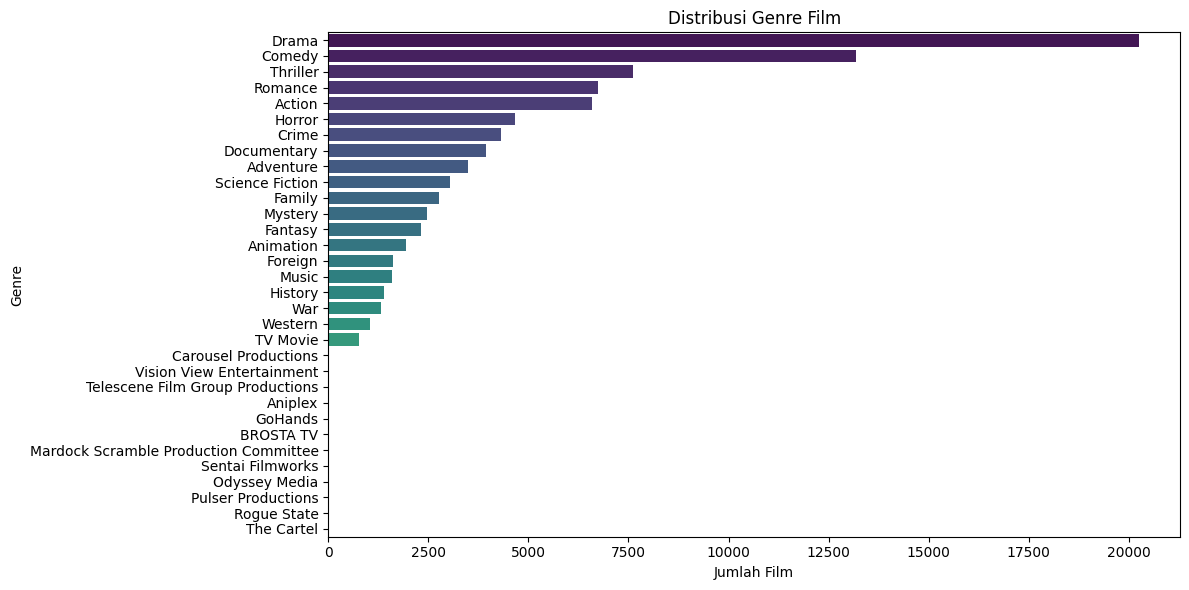

In [211]:
plt.figure(figsize=(12,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Distribusi Genre Film')
plt.xlabel('Jumlah Film')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

Insight: 

Genre yang paling banyak diproduksi adalah Drama, diikuti oleh Comedy, Thriller, dan Romance. Beberapa genre niche seperti Western, War, dan TV Movie hanya memiliki sedikit film. Terdapat label produksi seperti Carousel Productions dalam genre ini bisa jadi kesalahan parsing atau duplikasi kolom saat explode, jadi perlu dibersihkan.

In [212]:
movies_df['overview'] = movies_df['overview'].fillna('')
movies_df['overview_len'] = movies_df['overview'].apply(lambda x: len(x.split()))

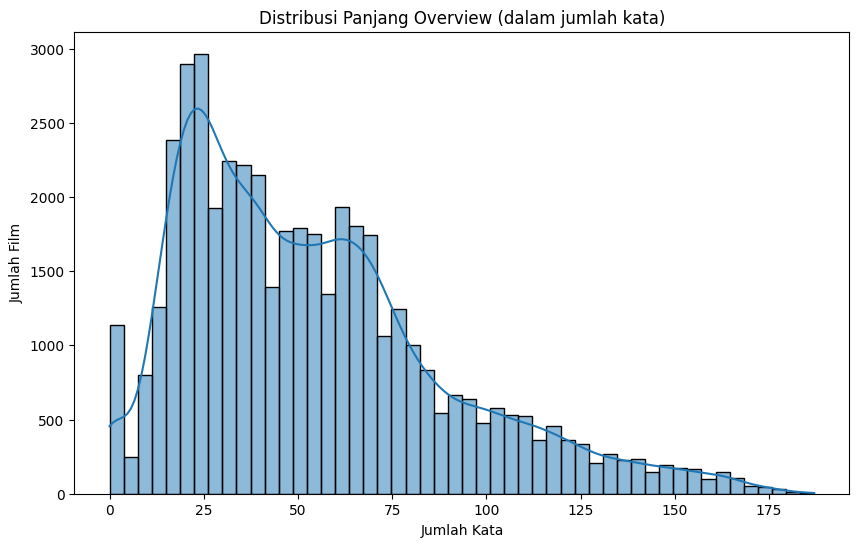

In [213]:
plt.figure(figsize=(10,6))
sns.histplot(movies_df['overview_len'], bins=50, kde=True)
plt.title('Distribusi Panjang Overview (dalam jumlah kata)')
plt.xlabel('Jumlah Kata')
plt.ylabel('Jumlah Film')
plt.show()

Insight:

Sebagian besar overview memiliki panjang sekitar 20–40 kata, yang menunjukkan bahwa mayoritas sinopsis film cukup pendek. Terdapat ekor panjang ke kanan (right-skewed), menandakan adanya overview dengan kata yang sangat banyak (hingga >150).

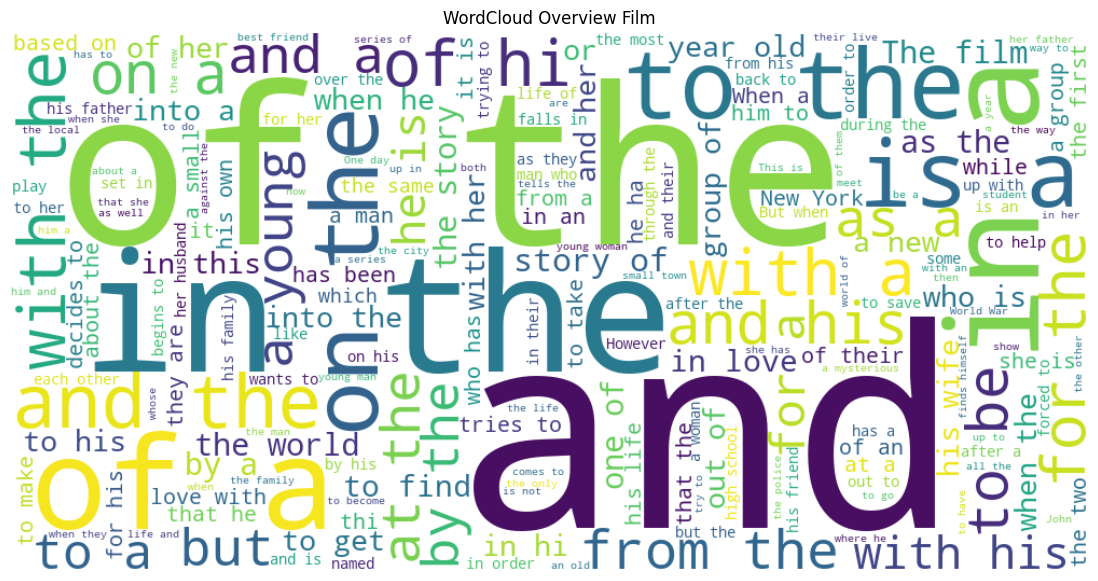

In [214]:
text = ' '.join(movies_df['overview'])
wordcloud = WordCloud(width=1000, height=500, background_color='white', stopwords='english').generate(text)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Overview Film')
plt.show()

Insight:

Kata-kata yang dominan adalah kata umum dalam bahasa Inggris seperti: "the", "a", "to", "of", "in", dll. Kata kunci kontekstual yang cukup sering muncul: "young", "man", "finds", "story", "life", "family" → menunjukkan tema film umum. Perlu melakukan stopwords removal.

Melakukan parse pada dataframe credits_df kolom cast dengan mengunakan ast.literal_eval(). Dari list cast hanya diambil 3 nama pertama kemudian akan disimpan di kolom baru bernama 'main_cast'.

In [215]:
credits_df['cast'] = credits_df['cast'].apply(ast.literal_eval)
credits_df['main_cast'] = credits_df['cast'].apply(lambda x: [i['name'] for i in x[:3]])
exploded_cast = credits_df.explode('main_cast')
top_actors = exploded_cast['main_cast'].value_counts().head(10)
print(top_actors)

main_cast
John Wayne           106
Jackie Chan           89
Michael Caine         86
Robert De Niro        84
Gérard Depardieu      83
Christopher Lee       74
Nicolas Cage          71
Bette Davis           68
Samuel L. Jackson     67
James Mason           67
Name: count, dtype: int64


C:\Users\acer\AppData\Local\Temp\ipykernel_11052\4197322541.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_actors.index, x=top_actors.values, palette='magma')


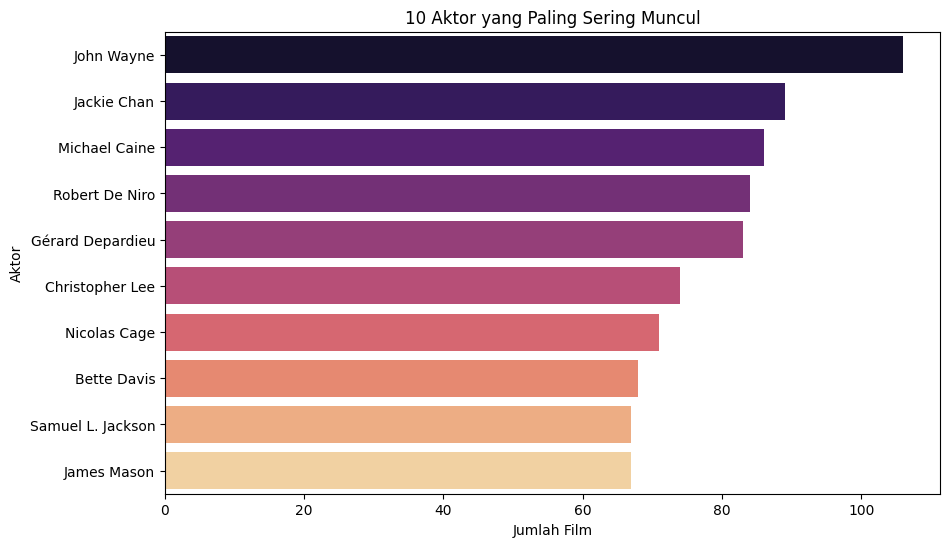

In [216]:
plt.figure(figsize=(10,6))
sns.barplot(y=top_actors.index, x=top_actors.values, palette='magma')
plt.title('10 Aktor yang Paling Sering Muncul')
plt.xlabel('Jumlah Film')
plt.ylabel('Aktor')
plt.show()

Insight:

Aktor-aktor ini menunjukkan produktivitas tinggi dalam jangka waktu panjang, tidak hanya dari satu dekade atau genre saja. Dominasi Gender: Hanya 1 wanita (Bette Davis) dalam 10 besar, mengindikasikan kemungkinan ketimpangan peran utama antara aktor dan aktris dalam industri film pada masa lalu. Keberagaman Asal: Terdapat aktor dari berbagai latar belakang budaya: Amerika (John Wayne, Jackson), Eropa (Depardieu, Mason), Asia (Jackie Chan), menunjukkan jangkauan global industri film.



## Data Preparation

Pada langkah ini melakukan persipan data bersarkan insight yang telah di dapatkan pada data understanding dan EDA.

Melakukan pembersihan data pada kolom 'overview' karena merupakan salah satu fitur yang digunakan pada pemodelan. 

In [217]:
movies_df['overview'] = movies_df['overview'].fillna('')

Mengubah type data pada kolom id yang sebelumnya masih bertype object diubah menjadi int.

In [218]:
movies_df['id'] = pd.to_numeric(movies_df['id'], errors='coerce')
movies_df = movies_df.dropna(subset=['id'])
movies_df['id'] = movies_df['id'].astype(int)

Insight :

Penanganan label tidak relevan pada kolom genres terjadi karena data korup, kemungkinan karena baris-baris tersebut berasal dari entri dengan `id` yang tidak valid.  Baris-baris tersebut telah dihapus saat proses konversi `id` ke integer.

Melakukan pengececekan terkait perubahan di atas.

In [219]:
movies_df.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                     0
popularity                   3
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      3
runtime                    260
spoken_languages             3
status                      84
tagline                  25051
title                        3
video                        3
vote_average                 3
vote_count                   3
overview_len                 0
dtype: int64

In [220]:
unique_genres = set([genre for sublist in movies_df['genres'] for genre in sublist])

print("Daftar Genre Unik:")
for genre in sorted(unique_genres):
    print(genre)

Daftar Genre Unik:
Action
Adventure
Animation
Comedy
Crime
Documentary
Drama
Family
Fantasy
Foreign
History
Horror
Music
Mystery
Romance
Science Fiction
TV Movie
Thriller
War
Western


Langkah selanjutnya adalah menggabungkan kedua DataFrame, yaitu movies_df dan credits_df, berdasarkan kolom id.

In [221]:
credits_df['id'] = credits_df['id'].astype(int)
movies_df['id'] = movies_df['id'].astype(int)
credits_clean = credits_df[['id', 'main_cast']]
df = movies_df.merge(credits_clean, on='id')

Mengurutkan df berdasarkan id terkecil

In [222]:
df = df.sort_values('id').reset_index(drop=True)

In [223]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,overview_len,main_cast
0,False,NaN,0,"[Drama, Crime]",NaN,2,tt0094675,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,...,69.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}, {'iso_6...",Released,NaN,Ariel,False,7.1,44.0,49,"[Turo Pajala, Susanna Haavisto, Matti Pellonpää]"
1,False,NaN,0,"[Drama, Comedy]",NaN,3,tt0092149,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",...,76.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Shadows in Paradise,False,7.1,35.0,21,"[Matti Pellonpää, Kati Outinen, Sakari Kuosmanen]"
2,False,NaN,4000000,"[Crime, Comedy]",NaN,5,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,...,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,False,6.5,539.0,38,"[Tim Roth, Antonio Banderas, Jennifer Beals]"
3,False,NaN,0,"[Action, Thriller, Crime]",NaN,6,tt0107286,en,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",...,110.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Don't move. Don't whisper. Don't even breathe.,Judgment Night,False,6.4,79.0,69,"[Emilio Estevez, Cuba Gooding Jr., Denis Leary]"
4,False,"{'id': 10, 'name': 'Star Wars Collection', 'po...",11000000,"[Adventure, Action, Science Fiction]",http://www.starwars.com/films/star-wars-episod...,11,tt0076759,en,Star Wars,Princess Leia is captured and held hostage by ...,...,121.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"A long time ago in a galaxy far, far away...",Star Wars,False,8.1,6778.0,52,"[Mark Hamill, Harrison Ford, Carrie Fisher]"


Dataset film yang digunakan awalnya memiliki ukuran yang sangat besar, sehingga pengolahan data secara penuh berpotensi menyebabkan keterbatasan memori dan waktu komputasi yang signifikan, terutama pada tahap perhitungan matriks kemiripan (cosine similarity) yang memerlukan sumber daya besar.
Untuk mengatasi kendala ini, dilakukan pemilihan subset data dengan mengambil 20.000 baris pertama dari dataset utama.

In [224]:
df_subset = df.head(20000).copy()

Menggabungkan genres, overview, dan main_cast ke dalam satu kolom teks gabungan (soup), sebagai dasar content-based filtering.

In [225]:
def clean_data(x):
    if isinstance(x, list):
        return ' '.join(x)
    elif isinstance(x, str):
        return x
    else:
        return ''
    
df_subset['soup'] = df_subset['genres'].apply(clean_data) + ' ' + \
                    df_subset['main_cast'].apply(clean_data) + ' ' + \
                    df_subset['overview']

Pada tahap ini, data teks yang sudah dipersiapkan (fitur gabungan seperti genre, cast, dan overview yang digabung menjadi satu kolom "soup") diubah menjadi representasi numerik menggunakan metode TF-IDF.TF-IDF vectorizer diatur dengan parameter stop words bahasa Inggris untuk menghilangkan kata-kata umum yang kurang bermakna (misalnya: "the", "and", "is").

In [226]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_subset['soup'])
print("TF-IDF matrix shape:", tfidf_matrix.shape)

TF-IDF matrix shape: (20000, 61679)


Melihat 10 fitur pertama dari TF-IDF vocabulary.

In [227]:
feature_names = tfidf.get_feature_names_out()
print("Contoh fitur TF-IDF:", feature_names[:10])

Contoh fitur TF-IDF: ['00' '000' '000th' '007' '0093' '01' '0123' '02' '03' '04']


Menampilkan sebagian nilai TF-IDF untuk 5 film pertama dan 10 kata pertama.

In [228]:
sample_tfidf = tfidf_matrix[:5, :10].toarray()

print(sample_tfidf)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


## Modeling

Implementasi cosine similarity dilakukan dengan menggunakan fungsi linear_kernel dari pustaka scikit-learn. Fungsi ini menghitung dot product antar vektor TF-IDF, yang dalam konteks vektor sudah ternormalisasi sama dengan cosine similarity.

In [229]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
print("Cosine similarity matrix shape:", cosine_sim.shape)
print("Similarity film index 0 dengan film lain:", cosine_sim[0][:10])

Cosine similarity matrix shape: (20000, 20000)
Similarity film index 0 dengan film lain: [1.         0.1379781  0.0141284  0.01093483 0.         0.00714284
 0.03378619 0.02738466 0.00816586 0.03184447]


Kode ini digunakan untuk mencari 10 film yang paling mirip dengan sebuah film tertentu berdasarkan nilai cosine similarity. Nilai kemiripan ini dihitung dari representasi teks gabungan yang terdiri dari fitur genres, overview, dan cast menggunakan metode TF-IDF (Term Frequency-Inverse Document Frequency).

In [230]:
index_film = 0
sim_scores = list(enumerate(cosine_sim[index_film]))

sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
top_similar = sim_scores[1:11]  # Ambil 10 teratas

for i, score in top_similar:
    print(f"{movies_df['title'][i]} (Similarity Score: {score:.4f})")


Once Upon A Time in Phuket (Similarity Score: 0.1677)
Cargo 200 (Similarity Score: 0.1616)
Caged Heat (Similarity Score: 0.1605)
The Mummy's Ghost (Similarity Score: 0.1465)
She-Wolf of London (Similarity Score: 0.1455)
Jumanji (Similarity Score: 0.1380)
Who Dares Wins (Similarity Score: 0.1136)
Cimarron (Similarity Score: 0.1126)
High Anxiety (Similarity Score: 0.1022)
Eastern Plays (Similarity Score: 0.1007)


## Mendapatkan Rekomendasi

Setelah membangun matriks cosine similarity, kita dapat memanfaatkannya untuk membangun sistem rekomendasi yang mampu memberikan daftar film yang paling mirip dengan film tertentu. Pada bagian ini, kita membangun fungsi rekomendasi berdasarkan judul film input dari pengguna.

Fungsi get_recommendations()

Fungsi ini dirancang untuk menerima input berupa judul film, lalu mengembalikan 10 film paling mirip berdasarkan nilai cosine similarity.

In [231]:
movies_df = movies_df.reset_index(drop=True)
indices = pd.Series(movies_df.index, index=movies_df['title'].str.lower())

def get_recommendations(title, cosine_sim=cosine_sim):
    title = title.lower()
    idx = indices.get(title)
    
    if idx is None:
        return "Judul tidak ditemukan dalam dataset."
    
    # Jika idx adalah array-like, ambil indeks pertama
    if isinstance(idx, pd.Series):
        idx = idx.iloc[0]

    sim_scores = list(enumerate(cosine_sim[idx]))
    
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # exclude itself
    
    movie_indices = [i[0] for i in sim_scores]
    
    return movies_df[['title', 'genres']].iloc[movie_indices]

Contoh Penggunaan

In [232]:
get_recommendations("The Dark Knight Rises")

,title,genres
5013,The Lone Ranger and the Lost City of Gold,"[Action, Adventure, Western]"
10130,The Bridge of San Luis Rey,"[Romance, Drama]"
6550,Once Upon a Time in the Midlands,"[Action, Comedy, Drama, Romance]"
15379,Rampage,"[Action, Drama, Crime, Thriller]"
16842,Sucker Punch,"[Action, Fantasy, Thriller]"
6787,Billabong Odyssey,"[Action, Adventure, Documentary]"
18003,Prisoners of the Lost Universe,"[Adventure, Science Fiction, Action]"
2573,The General's Daughter,"[Crime, Drama, Mystery, Thriller]"
6856,Last Tango in Paris,"[Drama, Romance]"
10730,The Creeping Unknown,"[Horror, Science Fiction]"


## Evaluasi

Untuk mengevaluasi performa sistem rekomendasi secara kualitatif, dilakukan evaluasi manual dengan memilih beberapa judul film populer sebagai test case. Film yang dipilih diharapkan memiliki karakteristik yang kuat, sehingga memungkinkan untuk melihat apakah sistem mampu menghasilkan rekomendasi yang relevan secara tematis maupun berdasarkan kemiripan fitur.

In [233]:
titles_to_test = ["The Dark Knight", "The Dark Knight Rises",]

for title in titles_to_test:
    print(f"Rekomendasi untuk film: {title}")
    print(get_recommendations(title))
    print('-'*100)


Rekomendasi untuk film: The Dark Knight
                        title                              genres
16541      Down Argentine Way     [Comedy, Drama, Music, Romance]
15273    Supermen of Malegaon                       [Documentary]
17351      Street Without End                             [Drama]
14376        Fun Is Beautiful                            [Comedy]
11764             Big Nothing   [Action, Comedy, Crime, Thriller]
17957                 No Exit                                  []
1706        A Cool, Dry Place                    [Drama, Romance]
13551     With Fire and Sword  [Adventure, Crime, Drama, History]
3526   The Abominable Snowman                 [Adventure, Horror]
6198         Marooned in Iraq                    [Drama, Foreign]
----------------------------------------------------------------------------------------------------
Rekomendasi untuk film: The Dark Knight Rises
                                           title  \
5013   The Lone Ranger and the Lost

In [234]:
def plot_genre_distribution(recommendations):
    # Flatten list of genres
    all_genres = []
    for genres_list in recommendations['genres']:
        if isinstance(genres_list, list):
            all_genres.extend(genres_list)
        else:
            all_genres.append(genres_list)
    
    genre_counts = Counter(all_genres)
    genres, counts = zip(*genre_counts.most_common())
    
    plt.figure(figsize=(10,6))
    plt.bar(genres, counts)
    plt.xticks(rotation=45, ha='right')
    plt.title('Distribusi Genre Film Rekomendasi')
    plt.xlabel('Genre')
    plt.ylabel('Jumlah')
    plt.show()

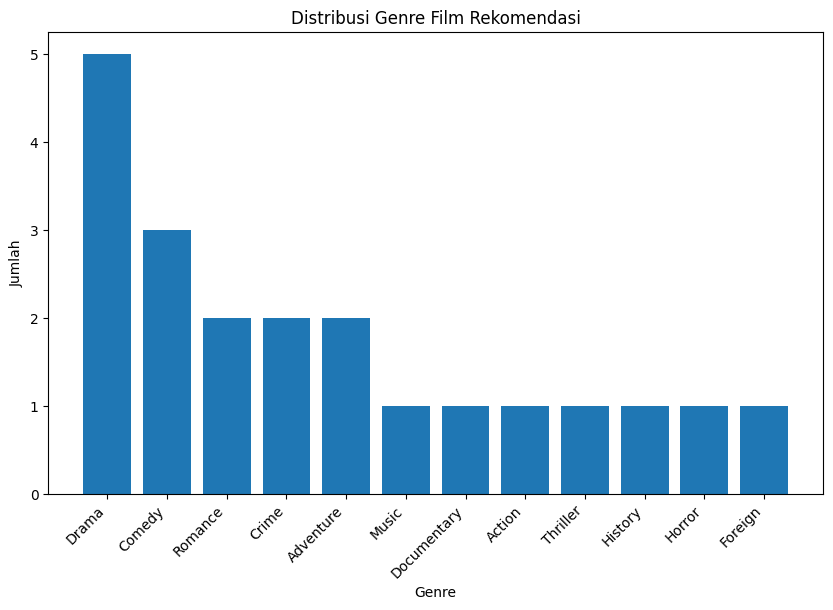

In [235]:
recommendations = get_recommendations("The Dark Knight")
plot_genre_distribution(recommendations)

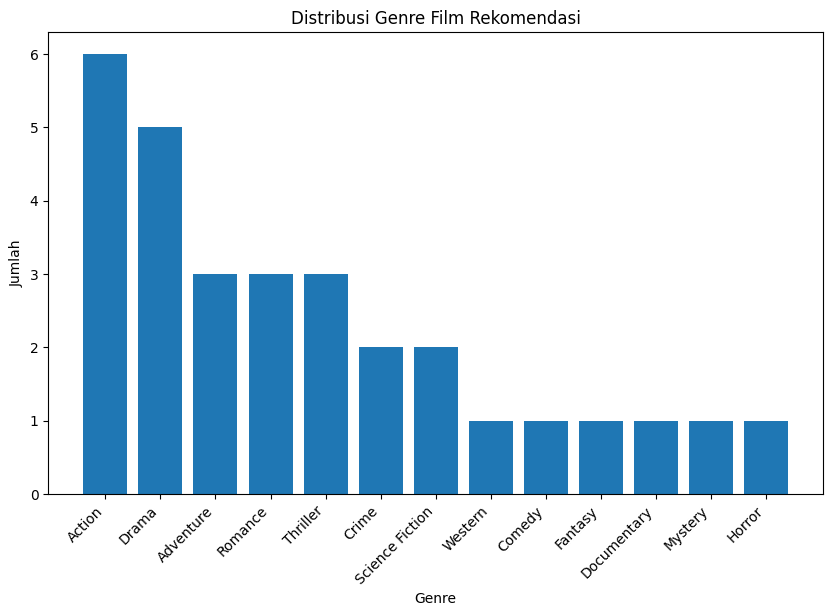

In [236]:
recommendations = get_recommendations("The Dark Knight Rises")
plot_genre_distribution(recommendations)

Selain evaluasi manual, dilakukan juga evaluasi kuantitatif untuk menilai sejauh mana sistem rekomendasi mampu menyarankan film yang benar-benar relevan bagi pengguna. Pada tahap ini, metrik evaluasi yang digunakan meliputi:
1. Confusion Matrix
2. Precision
3. Recall

In [237]:
ground_truth = set(["The Dark Knight", "Inception", "Interstellar"])

recommendations = set(["Justice League", "Inception", "The Dark Knight", "Avatar"])

all_films = list(set(movies_df['title'].tolist()))

y_true = [1 if film in ground_truth else 0 for film in all_films]
y_pred = [1 if film in recommendations else 0 for film in all_films]

cm = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:")
print(cm)

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Confusion Matrix:
[[42273     2]
 [    1     2]]
Precision: 0.50
Recall: 0.67


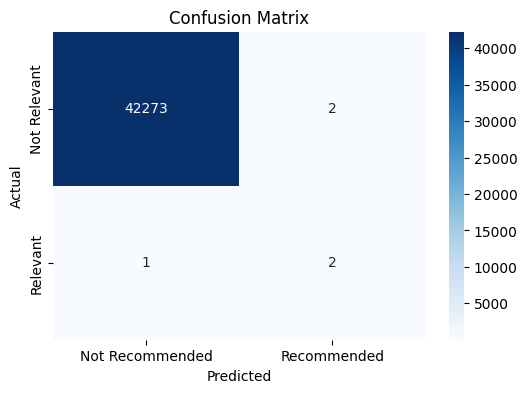

In [238]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Recommended', 'Recommended'],
            yticklabels=['Not Relevant', 'Relevant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()